<a href="https://colab.research.google.com/github/pHoangKhuong/20130297_PhamHoangKhuong/blob/main/Lab_7_20130297_PhamHoangKhuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from scipy.cluster import hierarchy
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_openml
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [3]:
#code
iris = load_iris()
X = iris.data
y = iris.target
clf = SVC()
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.04)


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [5]:
#code
iris = load_iris()
X = iris.data
y = iris.target
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)
clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(clf, X_new, y, cv=5)
print("Accuracy:", scores.mean())


Accuracy: 0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [8]:
# code
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.
x_test = x_test.reshape(x_test.shape[0], -1) / 255.
kmeans = KMeans(n_clusters=10, random_state=0)
predict_train = kmeans.fit_predict(x_train)
predict_test = kmeans.predict(x_test)
accuracy_train = accuracy_score(y_train, predict_train)
accuracy_test = accuracy_score(y_test, predict_test)
print("Accuracy Train:", accuracy_train)
print("Accuracy Test:", accuracy_test)

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy Train: 0.09685
Accuracy Test: 0.1054


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [9]:
# code


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





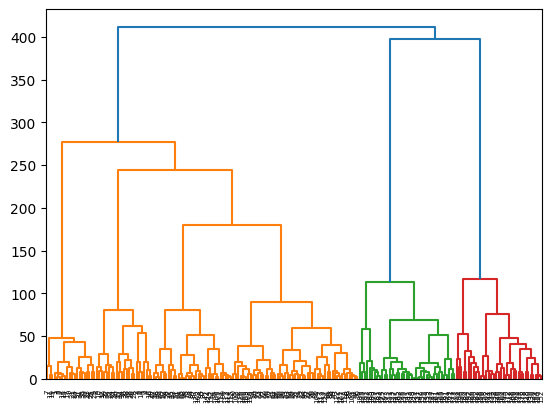

In [ ]:
#code
# Load the dataset
df = pd.read_csv('shopping-data.csv')

# Drop non-numeric columns
df = df.drop(['CustomerID', 'Genre'], axis=1)

# Calculate the distance matrix using 'ward' linkage
dists = hierarchy.distance.pdist(df)
linkage = hierarchy.linkage(dists, method='ward')

# Plot the dendrogram
hierarchy.dendrogram(linkage)

# Show the plot
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

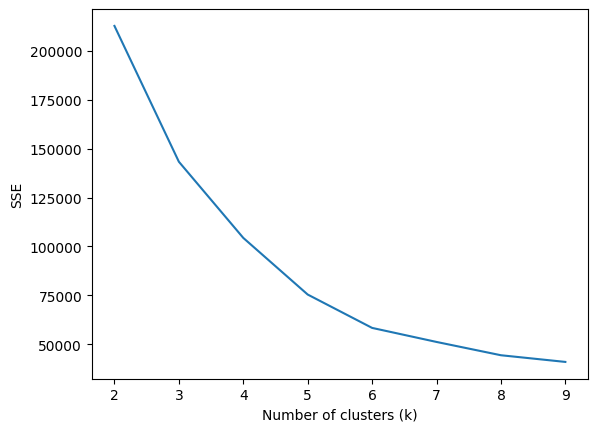

In [ ]:
#code
# Load the preprocessed dataset
df = pd.read_csv('shopping-data.csv')
X = df.drop(['CustomerID', 'Genre'], axis=1)

# Define the range of k values to explore
k_range = range(2, 10)

# Initialize an empty list to store SSE values for each value of k
sse = []

# Iterate over the range of k values
for k in k_range:
    # Apply K-Means clustering for current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Append SSE value to the list
    sse.append(kmeans.inertia_)

# Plot SSE values against k
plt.plot(k_range, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

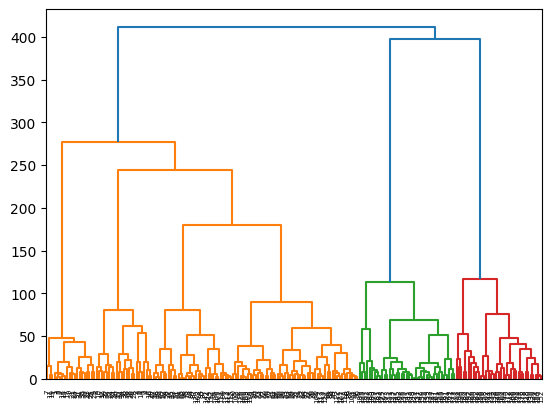

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [ ]:
#code
# Load the dataset and preprocess it by dropping non-numeric columns
df = pd.read_csv('shopping-data.csv')
X = df.drop(['CustomerID', 'Genre'], axis=1)

# Perform hierarchical clustering using 'ward' linkage
Z = linkage(X, method='ward')

# Plot the dendrogram to visualize the hierarchical structure of the data
dendrogram(Z)
plt.show()

# Choose the appropriate number of clusters based on the dendrogram
k = 3

# Apply AgglomerativeClustering algorithm to the dataset
model = AgglomerativeClustering(n_clusters=k, linkage='ward')
model.fit(X)

# Assign cluster labels to data points and display them
labels = model.labels_
print(labels)

#Finally,
Save a copy in your Github. Remember renaming the notebook.